<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_2_without_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
housing_df=pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


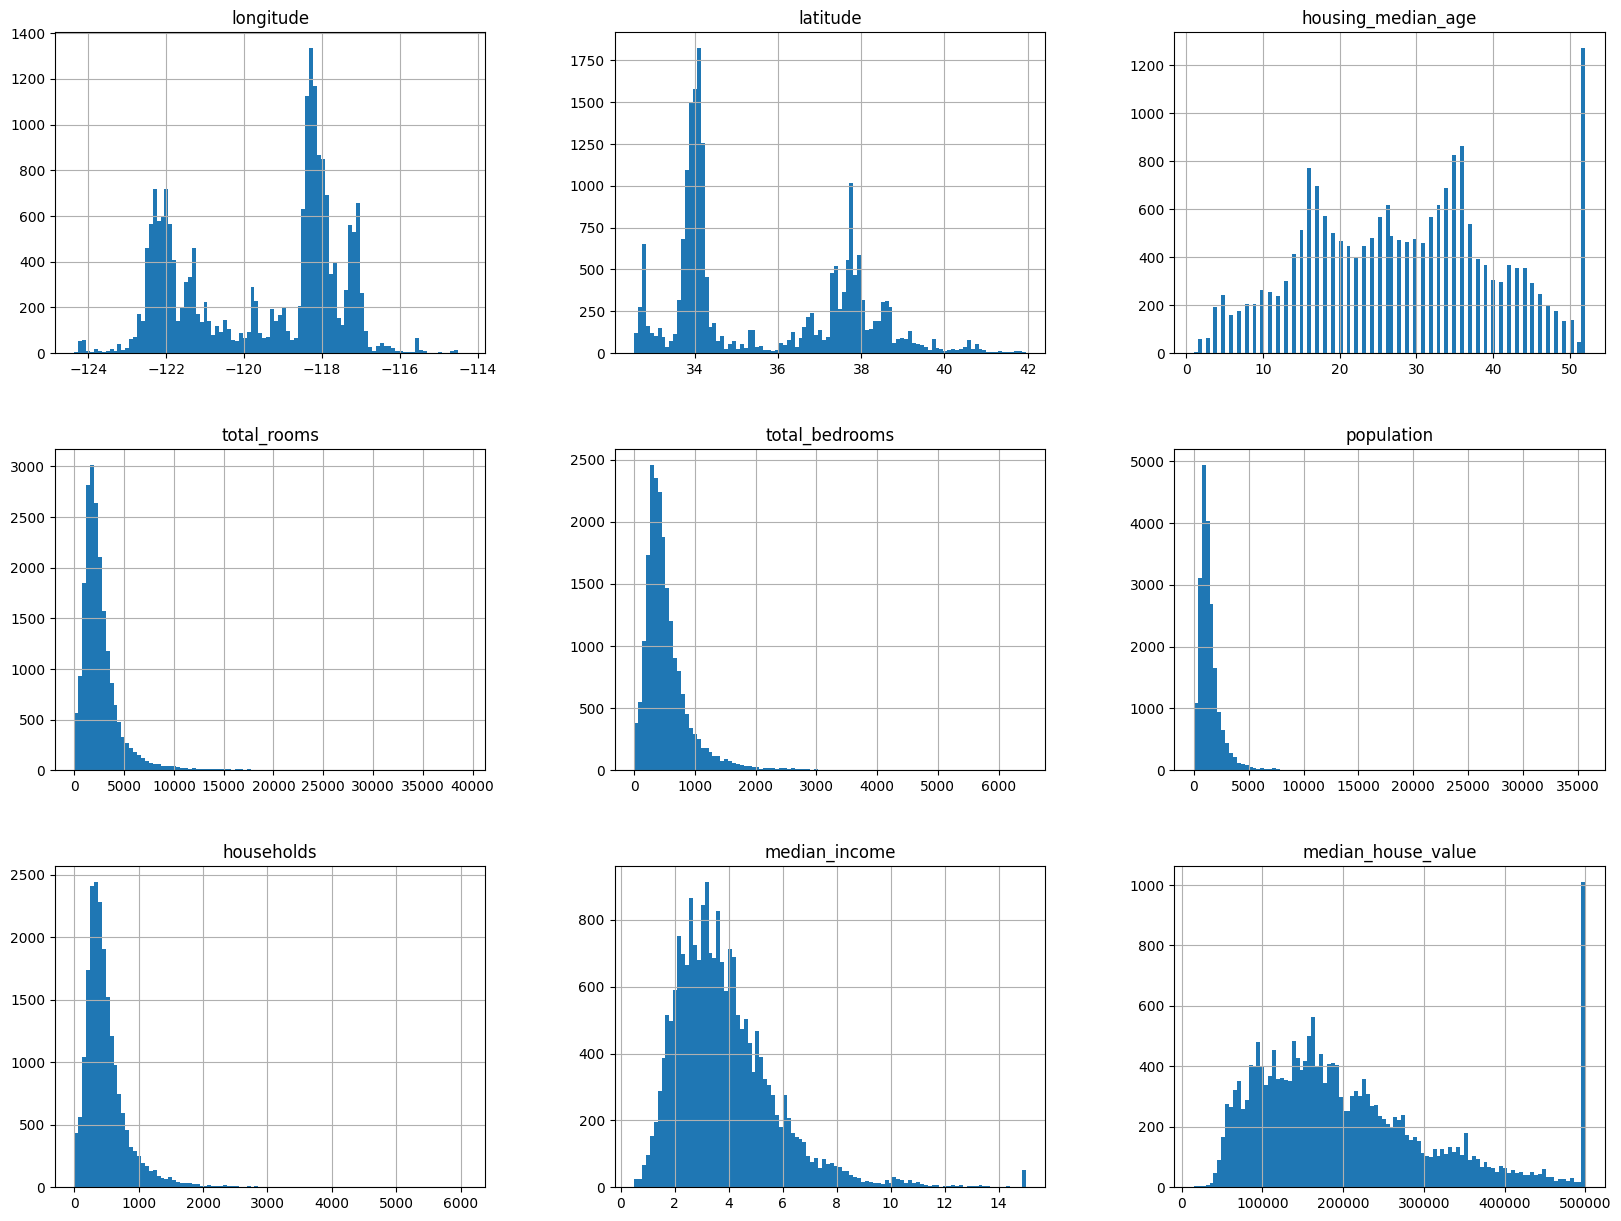

In [ ]:
housing_df.hist(bins=100,figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,test_df=train_test_split(housing_df,test_size=0.2,random_state=40)

In [ ]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN


<Axes: >

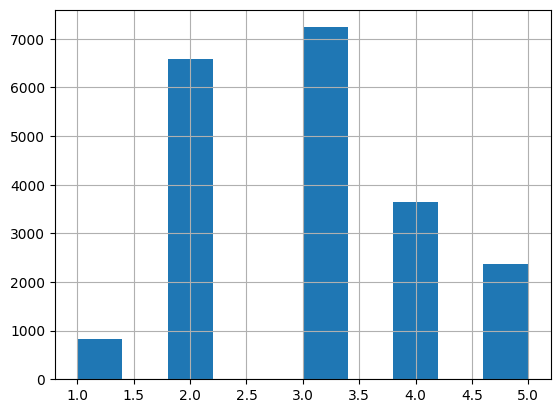

In [ ]:
housing_df["income_cat"]=pd.cut(housing_df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing_df["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)

for train_index,test_index in split.split(housing_df,housing_df["income_cat"]):
  stratified_train_set=housing_df.loc[train_index]
  stratified_test_set=housing_df.loc[test_index]

In [ ]:
stratified_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,2


In [ ]:
housing_copy_strata=stratified_train_set.copy()

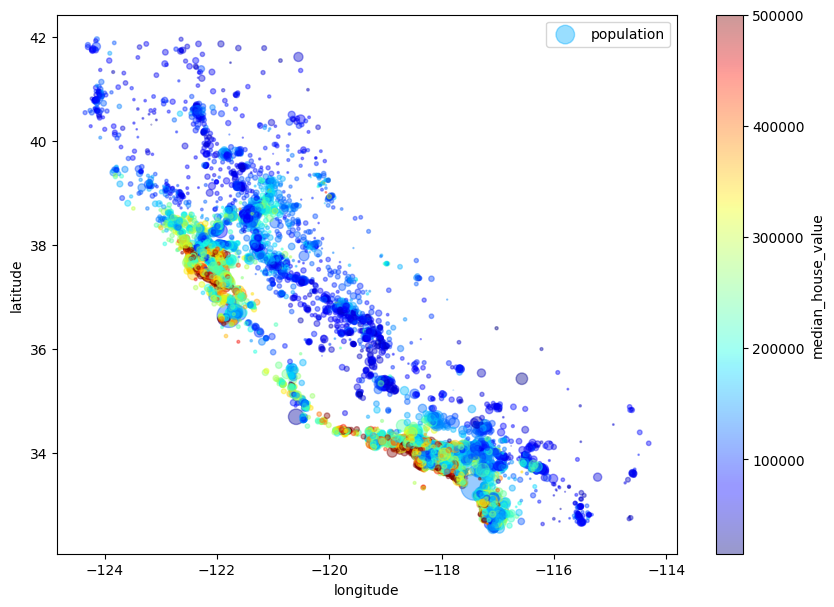

In [ ]:
housing_copy_strata.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing_copy_strata["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [ ]:
numeric_housing = housing_copy_strata.select_dtypes(include=['number'])
correlation_matrix=numeric_housing.corr()

In [ ]:
correlation_matrix.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925744,-0.103618,0.041015,0.066820,0.096875,0.052258,-0.020808,-0.051167
latitude,-0.925744,1.000000,0.006480,-0.032324,-0.064705,-0.106290,-0.068554,-0.072867,-0.137691
housing_median_age,-0.103618,0.006480,1.000000,-0.361585,-0.320116,-0.291642,-0.302235,-0.122442,0.105329
total_rooms,0.041015,-0.032324,-0.361585,1.000000,0.929260,0.854717,0.917051,0.200334,0.138007
total_bedrooms,0.066820,-0.064705,-0.320116,0.929260,1.000000,0.875837,0.979742,-0.008368,0.052814


In [ ]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.686865
total_rooms,0.138007
housing_median_age,0.105329
households,0.070014
total_bedrooms,0.052814
population,-0.021544
longitude,-0.051167
latitude,-0.137691


In [ ]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

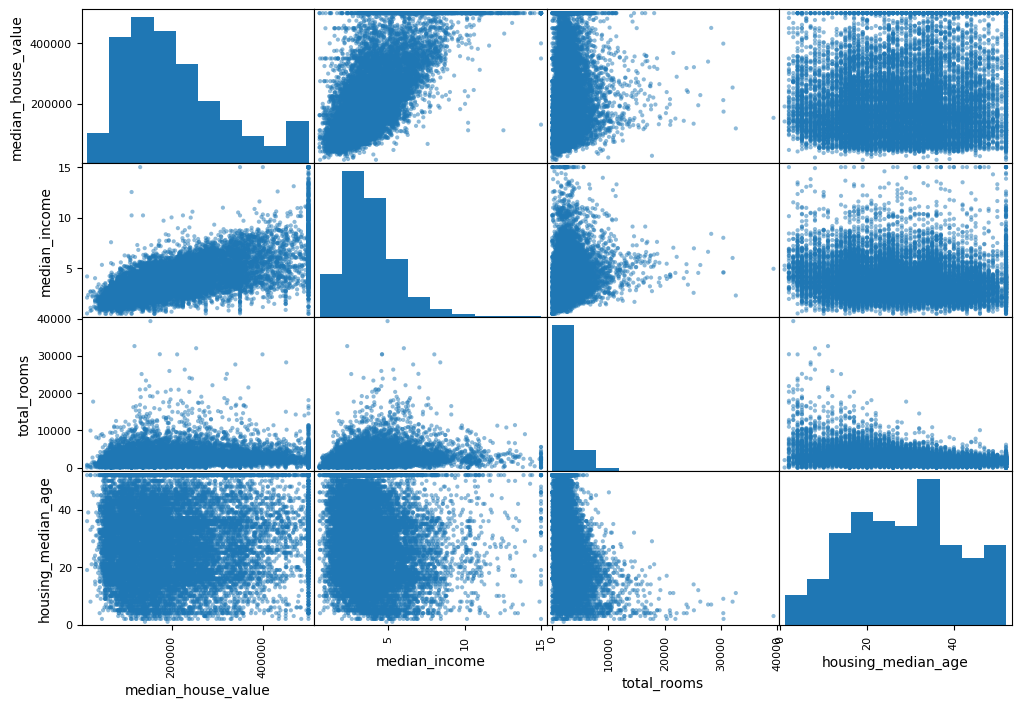

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_copy_strata[attributes], figsize=(12, 8))

In [ ]:
housing_copy_strata["rooms_per_household"] = housing_copy_strata["total_rooms"]/housing_copy_strata["households"]
housing_copy_strata["bedrooms_per_room"] = housing_copy_strata["total_bedrooms"]/housing_copy_strata["total_rooms"]
housing_copy_strata["population_per_household"]=housing_copy_strata["population"]/housing_copy_strata["households"]

In [ ]:
numeric_housing = housing_copy_strata.select_dtypes(include=['number'])
correlation_matrix=numeric_housing.corr()

In [ ]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.686865
rooms_per_household,0.159500
total_rooms,0.138007
housing_median_age,0.105329
households,0.070014
total_bedrooms,0.052814
population,-0.021544
population_per_household,-0.027110
longitude,-0.051167


In [ ]:
housing_copy_strata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   total_bedrooms            16344 non-null  float64 
 5   population                16512 non-null  float64 
 6   households                16512 non-null  float64 
 7   median_income             16512 non-null  float64 
 8   median_house_value        16512 non-null  float64 
 9   ocean_proximity           16512 non-null  object  
 10  income_cat                16512 non-null  category
 11  rooms_per_household       16512 non-null  float64 
 12  bedrooms_per_room         16344 non-null  float64 
 13  population_per_household  16512 non-null  float6

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing_copy_strata.drop(["ocean_proximity","income_cat"], axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16344 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16344 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [ ]:
imputer.statistics_

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53410000e+00,
        1.79200000e+05,  5.22483203e+00,  2.03423233e-01,  2.82065903e+00])

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [ ]:
housing_copy_strata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   total_bedrooms            16344 non-null  float64 
 5   population                16512 non-null  float64 
 6   households                16512 non-null  float64 
 7   median_income             16512 non-null  float64 
 8   median_house_value        16512 non-null  float64 
 9   ocean_proximity           16512 non-null  object  
 10  income_cat                16512 non-null  category
 11  rooms_per_household       16512 non-null  float64 
 12  bedrooms_per_room         16344 non-null  float64 
 13  population_per_household  16512 non-null  float6

In [ ]:
housing_copy_strata=housing_copy_strata.drop(["total_bedrooms",'bedrooms_per_room'],axis=1)
housing_copy_strata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   population                16512 non-null  float64 
 5   households                16512 non-null  float64 
 6   median_income             16512 non-null  float64 
 7   median_house_value        16512 non-null  float64 
 8   ocean_proximity           16512 non-null  object  
 9   income_cat                16512 non-null  category
 10  rooms_per_household       16512 non-null  float64 
 11  population_per_household  16512 non-null  float64 
dtypes: category(1), float64(10), object(1)
memory usage: 1.5+ MB


In [ ]:
housing_copy_strata["total_bedrooms"]=housing_tr['total_bedrooms']
housing_copy_strata['bedrooms_per_room']=housing_tr['bedrooms_per_room']

In [ ]:
housing_copy_strata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 16512 non-null  float64 
 1   latitude                  16512 non-null  float64 
 2   housing_median_age        16512 non-null  float64 
 3   total_rooms               16512 non-null  float64 
 4   population                16512 non-null  float64 
 5   households                16512 non-null  float64 
 6   median_income             16512 non-null  float64 
 7   median_house_value        16512 non-null  float64 
 8   ocean_proximity           16512 non-null  object  
 9   income_cat                16512 non-null  category
 10  rooms_per_household       16512 non-null  float64 
 11  population_per_household  16512 non-null  float64 
 12  total_bedrooms            16512 non-null  float64 
 13  bedrooms_per_room         16512 non-null  float6

In [ ]:
housing_copy_strata=housing_copy_strata.drop("income_cat",axis=1)

In [ ]:
housing_copy_strata.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,total_bedrooms,bedrooms_per_room
16415,-121.26,37.88,42.0,465.0,256.0,93.0,3.1719,158300.0,INLAND,5.000000,2.752688,93.0,0.200000
1279,-121.64,37.85,22.0,1999.0,967.0,320.0,4.4583,253900.0,INLAND,6.246875,3.021875,415.0,0.207604
7741,-118.15,33.95,35.0,2753.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,4.483713,2.592834,702.0,0.254995
4425,-118.24,34.07,27.0,223.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,2.719512,3.036585,80.0,0.358744
1283,-121.82,38.02,46.0,176.0,101.0,40.0,2.2361,93800.0,INLAND,4.400000,2.525000,43.0,0.244318


In [ ]:
housing_copy_strata= pd.get_dummies(housing_copy_strata, columns=['ocean_proximity'])
housing_copy_strata=housing_copy_strata.astype(int)

In [ ]:
housing_copy_strata.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,total_bedrooms,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16415,-121,37,42,465,256,93,3,158300,5,2,93,0,0,1,0,0,0
1279,-121,37,22,1999,967,320,4,253900,6,3,415,0,0,1,0,0,0
7741,-118,33,35,2753,1592,614,2,209000,4,2,702,0,1,0,0,0,0
4425,-118,34,27,223,249,82,1,137500,2,3,80,0,1,0,0,0,0
1283,-121,38,46,176,101,40,2,93800,4,2,43,0,0,1,0,0,0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class new_class(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedroom_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedroom_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]


In [ ]:
# housing_copy_strata=housing_copy_strata.drop(['rooms_per_household','population_per_household','bedrooms_per_room'],axis=1)

In [ ]:
new_attribute=new_class()
housing_extra_attribute=new_attribute.transform(housing_copy_strata.values)

<ipython-input-44-498f981889e4>:11: RuntimeWarning: divide by zero encountered in divide
  rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
<ipython-input-44-498f981889e4>:12: RuntimeWarning: divide by zero encountered in divide
  population_per_household = X[:, population_ix] / X[:, households_ix]


In [ ]:
housing_extra_attribute

array([[-1.21000000e+02,  3.70000000e+01,  4.20000000e+01, ...,
         1.55000000e+02,  3.10000000e+01,  5.50537634e-01],
       [-1.21000000e+02,  3.70000000e+01,  2.20000000e+01, ...,
         4.99750000e+02,  8.00000000e+01,  4.83741871e-01],
       [-1.18000000e+02,  3.30000000e+01,  3.50000000e+01, ...,
         1.37650000e+03,  3.07000000e+02,  5.78278242e-01],
       ...,
       [-1.18000000e+02,  3.40000000e+01,  4.80000000e+01, ...,
         3.12000000e+02,  5.38000000e+01,  5.28846154e-01],
       [-1.21000000e+02,  3.70000000e+01,  3.60000000e+01, ...,
         1.03766667e+03,  1.81333333e+02,  5.60873755e-01],
       [-1.18000000e+02,  3.40000000e+01,  3.70000000e+01, ...,
         3.06800000e+02,  5.18000000e+01,  4.89569752e-01]])